In [1]:
#Loading all Packages
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from collections import Counter
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.cross_validation import train_test_split
from sklearn import datasets
%matplotlib inline

print("==================== Packages Loaded ======================")

==================== Packages Loaded ======================


In [21]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('DataReady.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("==================== Data shape "+str(df.shape)+" ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 14 columns):
Age                           57 non-null object
Country                       57 non-null object
Peaceful_Country              57 non-null object
Faith_Government              57 non-null object
Age_Government                57 non-null object
MilitaryBudget_Shocking       57 non-null object
Disliked_Country              57 non-null object
Dislike_Reason                57 non-null object
Dislike_RaceReligion          28 non-null object
Peace_Idea                    57 non-null object
NoPeace_Reason                57 non-null object
AffluentCountries_Overstep    57 non-null object
News_Source                   57 non-null object
Trust_Media                   57 non-null object
dtypes: object(14)
memory usage: 6.3+ KB
==================== Data Loaded In ======================
==================== Data shape (57, 14) =============

In [22]:
del df['Dislike_RaceReligion']
del df['Dislike_Reason']

# Doing one hot encoding of categorical variables
df['Age']=df['Age'].replace(['20-30','30-40','40-50','50-60','Greater than 60'], [0,1,2,3,4]) 
# Country
df['Country']=df['Country'].astype('category')
dummies=pd.get_dummies(df['Country'],prefix='Country')
df = pd.concat([df, dummies], axis=1)
del df['Country']
# Peaceful_Country
df['Peaceful_Country']=df['Peaceful_Country'].replace(['No','Maybe','Yes'], [0,1,2])
# Faith_Government
df['Faith_Government']=df['Faith_Government'].replace(['No','Maybe','Yes'], [0,1,2])
# Age_Government
df['Age_Government']=df['Age_Government'].replace(['Senior','Mix of the both','Youth'], [0,1,2])
# MilitaryBudget_Shocking
df['MilitaryBudget_Shocking']=df['MilitaryBudget_Shocking'].replace(['No','Yes'], [0,1])
# Disliked_Country
df['Disliked_Country']=df['Disliked_Country'].astype('category')
dummies=pd.get_dummies(df['Disliked_Country'],prefix='Disliked_Country')
df = pd.concat([df, dummies], axis=1)
del df['Disliked_Country']
# Peace_Idea
df['Peace_Idea']=df['Peace_Idea'].astype('category')
dummies=pd.get_dummies(df['Peace_Idea'],prefix='Peace_Idea')
df = pd.concat([df, dummies], axis=1)
del df['Peace_Idea']
# NoPeace_Reason
df['NoPeace_Reason']=df['NoPeace_Reason'].astype('category')
dummies=pd.get_dummies(df['NoPeace_Reason'],prefix='NoPeace_Reason')
df = pd.concat([df, dummies], axis=1)
del df['NoPeace_Reason']
# Peaceful_Country
df['AffluentCountries_Overstep']=df['AffluentCountries_Overstep'].replace(['No','Maybe','Yes'], [0,1,2])
# News_Source
df['News_Source']=df['News_Source'].astype('category')
dummies=pd.get_dummies(df['News_Source'],prefix='News_Source')
df = pd.concat([df, dummies], axis=1)
del df['News_Source']
# Trust_Media
df['Trust_Media']=df['Trust_Media'].replace(['No','Maybe','Yes'], [0,1,2])

df.head()

,Age,Peaceful_Country,Faith_Government,Age_Government,MilitaryBudget_Shocking,AffluentCountries_Overstep,Trust_Media,Country_Chile,Country_HongKong,Country_India,Country_Italy,Country_Mexico,Country_Turkey,Country_USA,Country_Uae,Disliked_Country_Afghanistan,Disliked_Country_Bolivia,Disliked_Country_China,Disliked_Country_France,Disliked_Country_Germany,Disliked_Country_India,Disliked_Country_Iraq,Disliked_Country_Israel,Disliked_Country_None,Disliked_Country_Pakistan,Disliked_Country_Peru,Disliked_Country_Saudi Arabia,Disliked_Country_Somaliya,Disliked_Country_Syria,Disliked_Country_USA,"Peace_Idea_As long as you are happy, that is peace for you",Peace_Idea_Being free of borders and politics,Peace_Idea_Being free of terrorism and war,Peace_Idea_Everyone being treated equally,NoPeace_Reason_Lack of strong leaders,NoPeace_Reason_Money earned from war,NoPeace_Reason_No education,NoPeace_Reason_Politics played by the goverment,NoPeace_Reason_Terorrism,News_Source_News papers,News_Source_Social Media,News_Source_TV
0,1,2,1,0,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,1,2,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,2,0,0,1,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,1,2,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,1,2,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


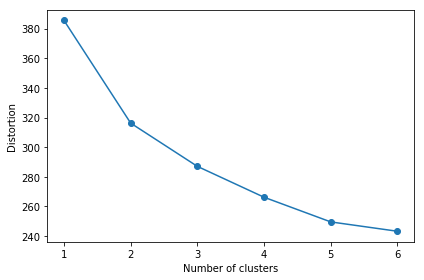

In [23]:
distortions = []
for i in range(1, 7):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=1)
    km.fit(df)
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [25]:
for i in range(0,5):
    if i>0:
        print("SSE :"+str(((distortions[i-1]-distortions[i])/distortions[i-1])*100)+" for k="+str(i))

SSE :17.992007158673847 for k=1
SSE :9.234430906339105 for k=2
SSE :7.266673370371317 for k=3
SSE :6.263337138783307 for k=4


### As expected 2 is the Best number of cluster

In [31]:
km  = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=50, 
            max_iter=52000,
            tol=1e-04,
            random_state=1)
y_km = km.fit_predict(df)

In [36]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('DataReady.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("==================== Data shape "+str(df.shape)+" ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 14 columns):
Age                           57 non-null object
Country                       57 non-null object
Peaceful_Country              57 non-null object
Faith_Government              57 non-null object
Age_Government                57 non-null object
MilitaryBudget_Shocking       57 non-null object
Disliked_Country              57 non-null object
Dislike_Reason                57 non-null object
Dislike_RaceReligion          28 non-null object
Peace_Idea                    57 non-null object
NoPeace_Reason                57 non-null object
AffluentCountries_Overstep    57 non-null object
News_Source                   57 non-null object
Trust_Media                   57 non-null object
dtypes: object(14)
memory usage: 6.3+ KB
==================== Data Loaded In ======================
==================== Data shape (57, 14) =============

In [37]:
df['cluster']=y_km

In [38]:
df.head()

,Age,Country,Peaceful_Country,Faith_Government,Age_Government,MilitaryBudget_Shocking,Disliked_Country,Dislike_Reason,Dislike_RaceReligion,Peace_Idea,NoPeace_Reason,AffluentCountries_Overstep,News_Source,Trust_Media,cluster
0,30-40,Chile,Yes,Maybe,Senior,Yes,Israel,War,Chinese,Being free of terrorism and war,No education,Yes,Social Media,Yes,1
1,30-40,Chile,Yes,No,Senior,Yes,Peru,None,Chinese,Being free of terrorism and war,Money earned from war,Yes,News papers,Maybe,1
2,20-30,India,Yes,No,Senior,Yes,None,None,Not specifically,Everyone being treated equally,Politics played by the goverment,Yes,Social Media,Yes,1
3,30-40,India,Yes,Yes,Senior,No,China,Politics,NaN,Everyone being treated equally,No education,Yes,TV,No,1
4,30-40,India,Yes,Maybe,Senior,Yes,None,None,No,Everyone being treated equally,Lack of strong leaders,Yes,Social Media,No,1


In [39]:
df['cluster'].value_counts()

1    45
0    12
Name: cluster, dtype: int64

In [40]:
df.to_csv('ClusterData.csv')